# **Linear Regression**: Human Brain Weight 🧠

This dataset was compiled using a medical study conducted on a group of people. This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns. The goal of the study is to predict the masses of the brains using the data, and later compare it with the actual masses of brains mentioned in the dataset.

# **Feature Selection**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Feature Selection </span><br>

## **0.** Settings

In [1]:
# Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd  

%matplotlib inline

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |--------------|------------|-------|--------------------------------------------------------------|
    | Name         | Data Type  | Meas. | Description                                                  |
    |--------------|------------|-------|--------------------------------------------------------------|
    | Gender       | nominal    |       | 1 represents Male, 2 represents Female                       |
    | Age Range    | nominal    |       | 1 represents >18 years of age, 2 represents <18 years of age |
    | Head Size    | continuous | cm^3  | Head volume                                                  |
    | Brain Weight | continuous | grams | Mass of brains                                               |
    |--------------|------------|-------|--------------------------------------------------------------|  

'''

In [2]:
# Import the dataset
data = pd.read_csv('./dataset.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [4]:
data.columns = ['Gender', 'Age Range', 'Head Size', 'Brain Weight']
data.columns

Index(['Gender', 'Age Range', 'Head Size', 'Brain Weight'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## **2.** Data Preprocessing

In [6]:
# Null elements
data.isnull().sum()

Gender          0
Age Range       0
Head Size       0
Brain Weight    0
dtype: int64

There are no missing values in this dataset.

## **3.** Feature Selection

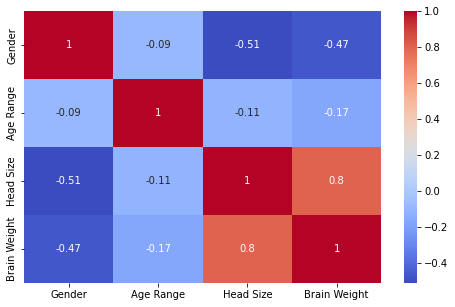

In [13]:
# Correlation matrix
correlation_matrix = data.corr().round(2)

plt.figure(figsize=(8,5));
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm');

The correlation coefficient ranges from -1 to 1:
* if the value is close to 1 there is a strong positive correlation between the two variables
* if the value is close to -1, the variables have a strong negative correlation

To fit a linear regression model, we select those features which have a **high correlation** with our target variable.<br>
An important point in selecting features for a linear regression model is to **check for multi-co-linearity**.<br> 

By looking at the correlation matrix we can see that the variable that is most correlated with the target (which in this case is 'Brain Weight') is 'Head Size' (0.8). The other variables are not strongly correlated with the target variable, but perhaps they are worth including in the training model. It is good that the variables are not correlated with each other: we should avoid selecting the features that are (highly) correlated together.

Using a scatter plot let’s see how these features vary with 'Brain Weight'.

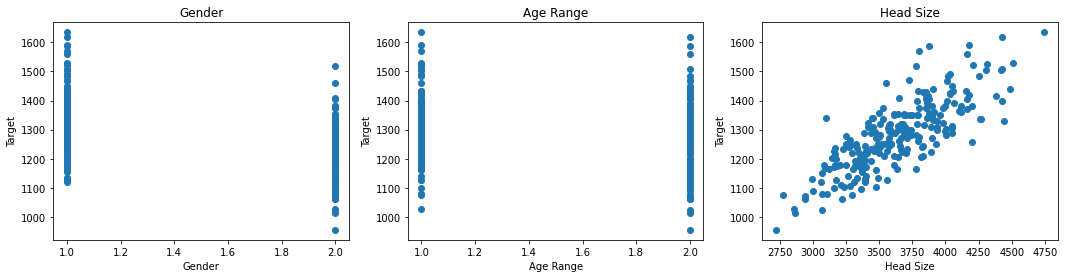

In [7]:
# Scatterplot of the features
plt.figure(figsize=(18, 4))

features = ['Gender', 'Age Range', 'Head Size']
target = data['Brain Weight']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')

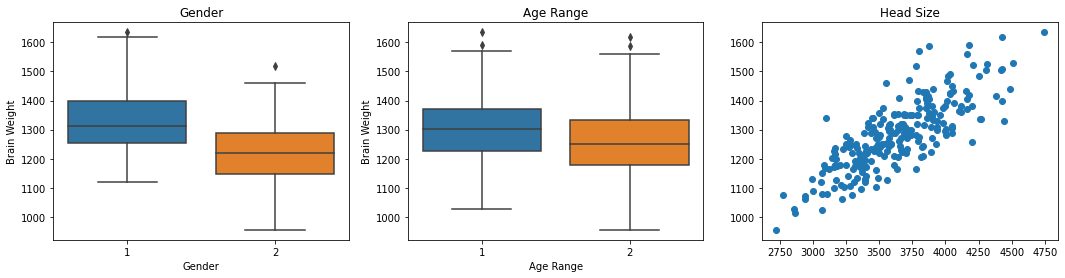

In [14]:
# It is better to consider the scatterplot only for continuous variables, 
# for categorical variables we consider a boxplot

plt.figure(figsize=(18, 4))

# Categorical
plt.subplot(1, 3, 1)
sns.boxplot(x=data['Gender'], y=target);
plt.title('Gender');

# Categorical
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Age Range'], y=target);
plt.title('Age Range');

# Continuous
plt.subplot(1, 3, 3)
plt.scatter(x=data['Head Size'], y=target, marker='o');
plt.title('Head Size');


**Insights**

* It seems that gender can make some difference
* The age range does not seem to have too much of an effect on its own (as even the confusion matrix suggests), perhaps, however, interaction with the other variables may give effect (as seen in the EDA notebook)
* The brain weight increase as the value of the head size increases linearly (it looks to be following exactly a linear line)